<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/assignment7_clustering(airlines)_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Hyrarchial clustering

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage 
from sklearn.preprocessing import normalize

In [5]:
# Import Dataset
data=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
data.set_index('ID',inplace=True)    # or can drop id data2=data.drop(['ID#'],axis=1) ---> data2
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [7]:
data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [8]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
# Normalize heterogenous numerical data 
data_norm=pd.DataFrame(normalize(data),columns=data.columns)
data_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

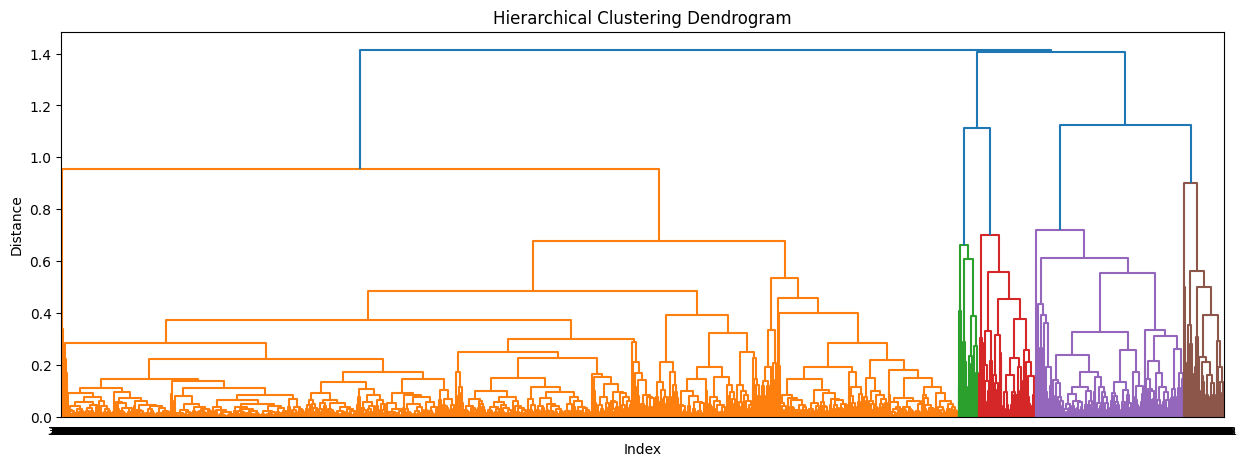

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [10]:
# Create Dendrograms
help(linkage)
z = linkage(data_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
help(linkage)

In [11]:
# Now applying AgglomerativeClustering choosing 5 as clusters from the dendrogram
hc=AgglomerativeClustering(n_clusters=5,linkage='complete',affinity = "euclidean").fit(data_norm)
y=pd.DataFrame(hc.fit_predict(data_norm),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    3086
1     509
3     197
2     137
4      70
Name: clustersid, dtype: int64

In [12]:
# Adding clusters to dataset
data['clustersid']=hc.labels_
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


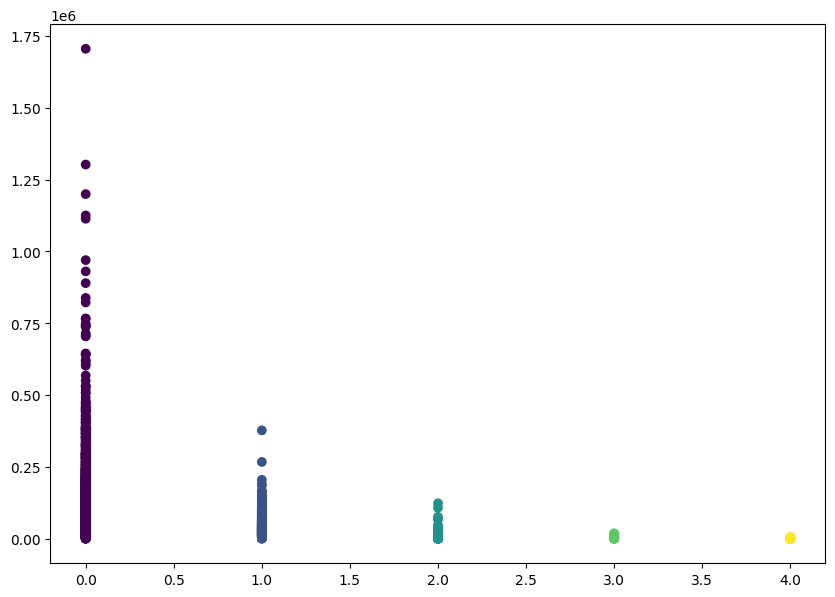

In [13]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clustersid'],data['Balance'], c=hc.labels_)

In [14]:
# creating a csv file 
data.to_csv("airlines.csv",encoding="utf-8")

2. K-Means Clustering

In [15]:
# Import Libraries
from sklearn.cluster import KMeans

In [16]:
# As we already have normalized data
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [22]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

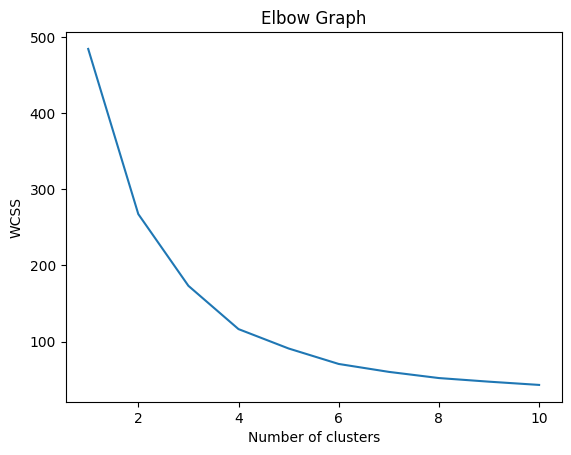

In [23]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Build Cluster algorithm using K=4

In [24]:
# Cluster algorithm using K=4
clusters=KMeans(4,random_state=30).fit(data_norm)
clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=30)

In [25]:
clusters.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [26]:
# Assign clusters to the data set
data2=data.copy()
data2['clustersid']=clusters.labels_
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,3


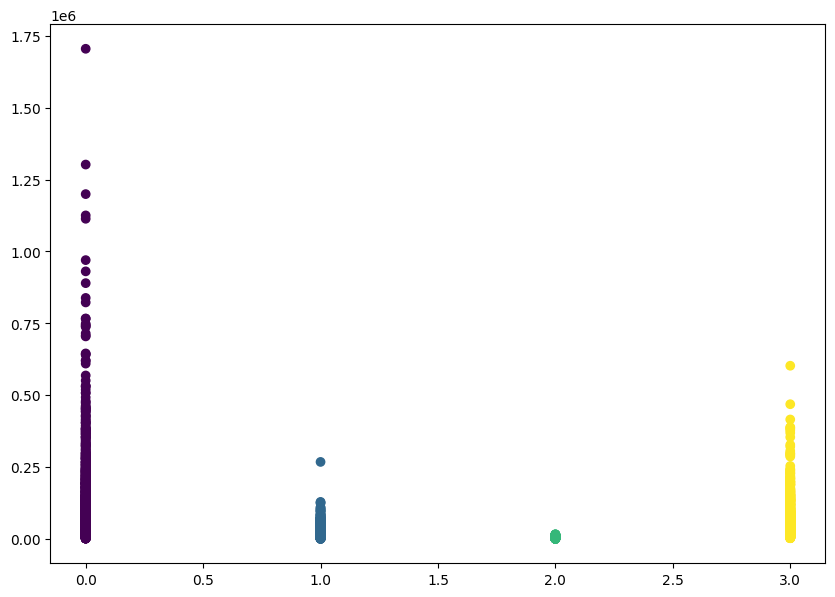

In [27]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data2['clustersid'],data2['Balance'], c=clusters.labels_) 


Build Cluster algorithm using K=5

In [29]:
# Cluster algorithm using K=5
clusters2=KMeans(5,random_state=30).fit(data_norm)
clusters2

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=30)

In [30]:
clusters2.labels_

array([0, 3, 0, ..., 4, 0, 3], dtype=int32)

In [32]:
# Assign clusters to the data set
data3=data.copy()
data3['clusters2id']=clusters2.labels_
data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid,clusters2id
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,3
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,3
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,4
4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,4


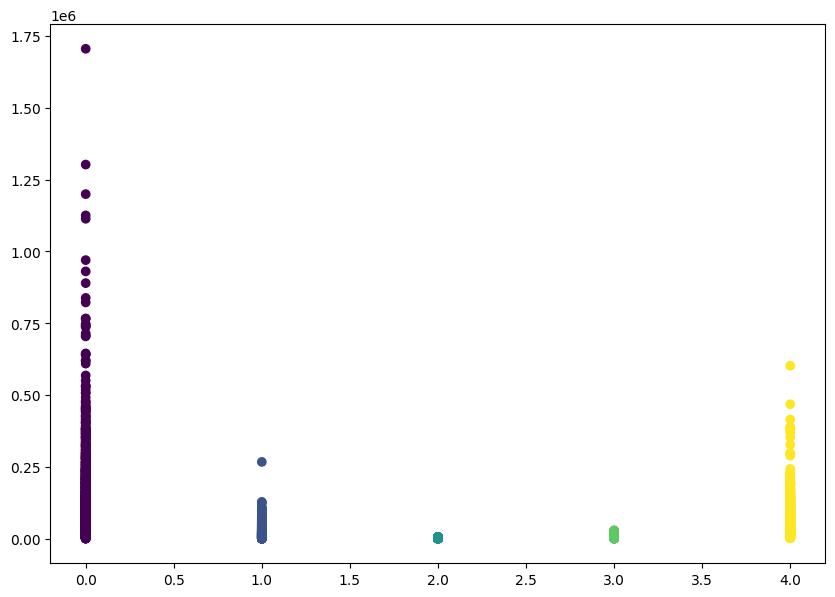

In [33]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data3['clusters2id'],data2['Balance'], c=clusters2.labels_)

3. DBSCAN

In [35]:
#Import libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [36]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
airline_norm=StandardScaler().fit_transform(data)
airline_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -4.57676236e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -4.57676236e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -4.57676236e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -4.57676236e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -4.57676236e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -4.57676236e-01]])

In [40]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(airline_norm)

DBSCAN(eps=1, min_samples=4)

In [41]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
# Adding clusters to dataset
data['clusters4']=dbscan.labels_
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid,clusters,clusters4
ID,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1


In [46]:
data.groupby('clusters4').agg(['mean']).reset_index()

,clusters4,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid,clusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,172471.756055,909.301038,2.771626,1.060554,1.084775,40122.164360,22.301038,2147.984429,6.174740,4750.617647,0.707612,0.391003,-1.0
1,0,60072.446958,4.890397,1.663650,1.000000,1.000000,8839.000503,8.866264,149.745601,0.473605,3751.638512,0.000000,0.000000,0.0
2,1,81722.546708,13.255743,2.154671,1.000000,1.000000,16302.108729,11.271057,340.131700,1.125574,4475.787136,1.000000,0.000000,1.0
3,2,44800.878676,5.841912,3.702206,1.000000,1.000000,37719.338235,16.948529,157.966912,0.463235,4430.411765,1.000000,1.000000,2.0
4,3,14731.232877,0.000000,3.726027,1.000000,1.000000,38200.931507,16.835616,126.109589,0.410959,4535.630137,1.000000,2.000000,3.0
5,4,8418.305556,13.888889,1.027778,1.000000,1.000000,2424.472222,5.916667,172.222222,0.527778,5708.194444,1.000000,3.000000,4.0
6,5,6892.854430,0.000000,1.000000,1.000000,1.000000,723.924051,2.835443,15.436709,0.101266,4659.094937,0.000000,3.000000,5.0
7,6,1617.263158,0.000000,1.000000,1.000000,1.000000,433.175439,1.877193,10.526316,0.087719,4717.456140,0.000000,4.000000,6.0
8,7,39733.181034,5.422414,2.681034,1.000000,1.000000,26875.603448,11.913793,39.655172,0.120690,3080.137931,0.000000,1.000000,7.0


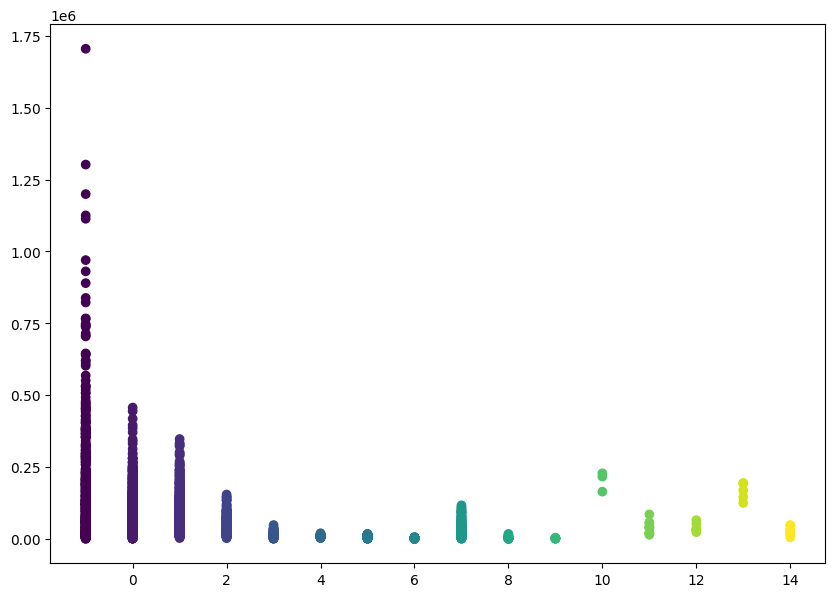

In [47]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['clusters4'],data['Balance'], c=dbscan.labels_)